In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Read the datasets
# Load the test and train files
dengue_features_train = pd.read_csv('../Datasets/dengue_features_train.csv')
dengue_features_test = pd.read_csv('../Datasets/dengue_features_test.csv')
dengue_labels_train = pd.read_csv('../Datasets/dengue_labels_train.csv')

In [3]:
# Display the data
dengue_features_test.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [4]:
dengue_features_train.describe()

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,...,1446.000000,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,...,40.151819,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,...,43.434399,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,...,13.055000,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,...,27.245000,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,...,52.200000,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,...,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000


In [5]:
dengue_features_train.describe(include = ['object'])

,city,week_start_date
count,1456,1456
unique,2,1049
top,sj,2002-12-10
freq,936,2


In [6]:
dengue_features_train.shape

(1456, 24)

In [7]:
# This dataset contatins information of 2 cities for 1456 weeks across 24 features

In [8]:
dengue_labels_train.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [9]:
# Merging the two dataframes
dengueTrain = pd.merge(dengue_labels_train, dengue_features_train, on=['city','year','weekofyear'])

In [10]:
dengueTrain.head()

,city,year,weekofyear,total_cases,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,4,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,5,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,4,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,3,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,6,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [11]:
dengueTrain.shape

(1456, 25)

In [12]:
# Check for Multiple rows
np.sum(dengueTrain.duplicated())

0

In [13]:
# Checking the test data
dengue_features_test.head(7)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1
5,sj,2008,23,2008-06-03,-0.0440,-0.030467,0.132000,0.083529,71.17,299.768571,...,22.55,76.557143,71.17,16.667143,2.857143,28.000000,5.171429,32.8,25.0,27.7
6,sj,2008,24,2008-06-10,-0.0443,-0.024925,0.132271,0.159157,48.99,300.062857,...,13.10,76.844286,48.99,17.010000,3.157143,27.400000,6.042857,31.1,23.3,91.7


In [14]:
dengue_features_test.shape

(416, 24)

In [15]:
# Check for duplicate rows
np.sum(dengue_features_test.duplicated())

0

# Exploratory Analysis

(0, 0.09)

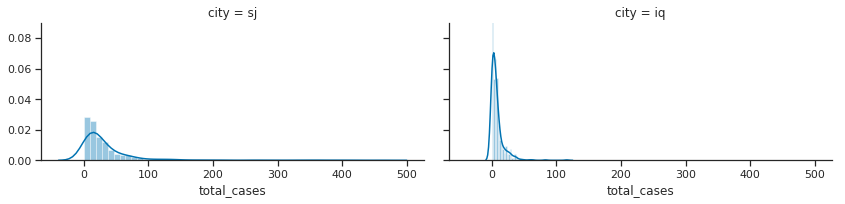

In [16]:
# Total cases of Dengue in the city's
sns.set(style="ticks", palette="colorblind")
g = sns.FacetGrid(dengueTrain, col="city",aspect=2)  
g.map(sns.distplot, "total_cases") 
axes = g.axes
axes[0,0].set_ylim(0,0.090)
axes[0,1].set_ylim(0,0.090)

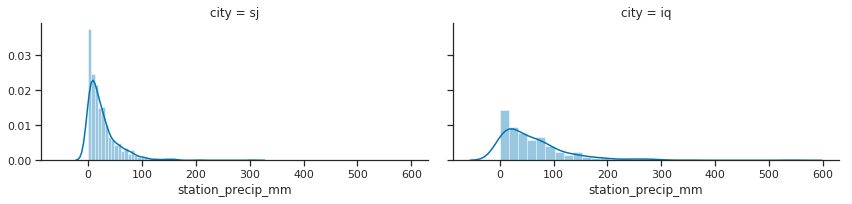

In [17]:
# Station_precip_mm in the city's
sns.set(style="ticks", palette="colorblind")
g = sns.FacetGrid(dengueTrain, col="city",aspect=2)  
g.map(sns.distplot, "station_precip_mm") 

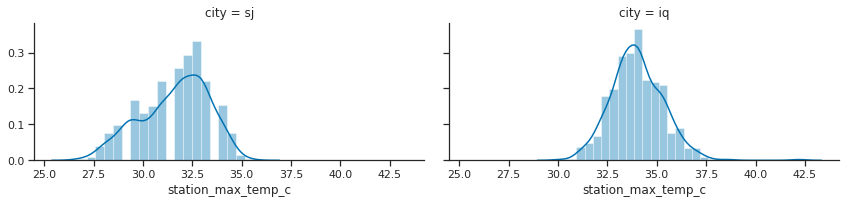

In [18]:
# Station_max_temp_c in the city's
sns.set(style="ticks", palette="colorblind")
g = sns.FacetGrid(dengueTrain, col="city",aspect=2)  
g.map(sns.distplot, "station_max_temp_c") 

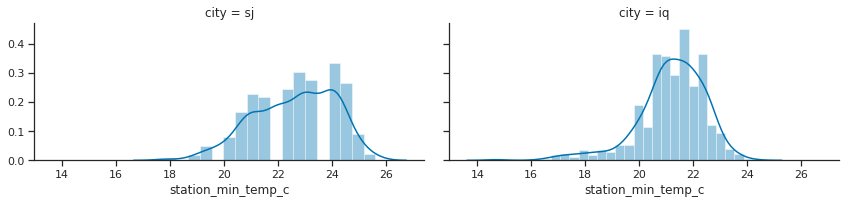

In [19]:
# Station_min_temp_c in the city's
sns.set(style="ticks", palette="colorblind")
g = sns.FacetGrid(dengueTrain, col="city",aspect=2)  
g.map(sns.distplot, "station_min_temp_c") 

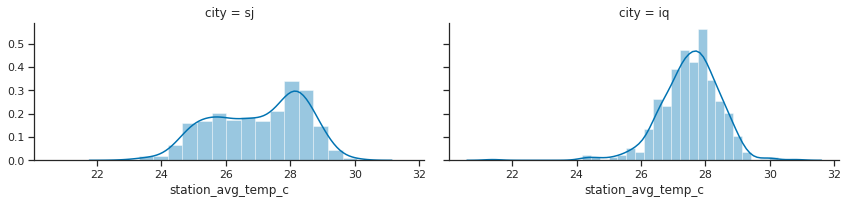

In [20]:
# Station_avg_temp_c in the city's
sns.set(style="ticks", palette="colorblind")
g = sns.FacetGrid(dengueTrain, col="city",aspect=2)  
g.map(sns.distplot, "station_avg_temp_c")

In [21]:
#Above plot shows that Iquitos is generally a littlbe bit hotter than San Juan,and the precipitation is much higher.
#Which might one of the reason for more in total cases of dengue is more in Iquitos

In [22]:
# Getting a comparison of the means of number of cases the two cities
dengueTrain.groupby('city').mean().total_cases

city
iq     7.565385
sj    34.180556
Name: total_cases, dtype: float64

In [23]:
# San Jaun has lot more cases than Iquitos

/home/chirag/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 0.98, 'Evolution of dengue disease through time')

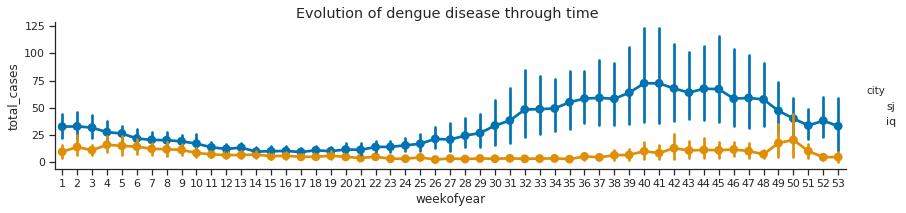

In [24]:
# Getting a timely plot of the disease
sns.set(style="ticks", palette="colorblind")
fig = sns.FacetGrid(dengueTrain, hue='city', aspect=4) 
fig.map(sns.pointplot,'weekofyear','total_cases')
max_x = dengueTrain.weekofyear.max()
min_x = dengueTrain.weekofyear.min()
# fig.set(xlim=(min_x,max_x))
# fig.set(ylim=(0, 80))
fig.add_legend()
fig.fig.suptitle("Evolution of dengue disease through time")

In [25]:
#In San Juan, one clear trend is that the dengue virus becomes a lot more active at the other half of the year,
#starting from July (week 28).
#In Iquitos, the disease develop much slower, with its peak at the very end of the year (week 50).

In [26]:
# Finding the missing values
dengueTrain.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
total_cases                                0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_ma

In [27]:
dengue_features_test.isnull().sum()

city                                      0
year                                      0
weekofyear                                0
week_start_date                           0
ndvi_ne                                  43
ndvi_nw                                  11
ndvi_se                                   1
ndvi_sw                                   1
precipitation_amt_mm                      2
reanalysis_air_temp_k                     2
reanalysis_avg_temp_k                     2
reanalysis_dew_point_temp_k               2
reanalysis_max_air_temp_k                 2
reanalysis_min_air_temp_k                 2
reanalysis_precip_amt_kg_per_m2           2
reanalysis_relative_humidity_percent      2
reanalysis_sat_precip_amt_mm              2
reanalysis_specific_humidity_g_per_kg     2
reanalysis_tdtr_k                         2
station_avg_temp_c                       12
station_diur_temp_rng_c                  12
station_max_temp_c                        3
station_min_temp_c              

In [28]:
# Getting the numbers in the form of city variables
dengueTrain.city.value_counts()

sj    936
iq    520
Name: city, dtype: int64

In [29]:
dengue_features_test.city.value_counts()

sj    260
iq    156
Name: city, dtype: int64

In [30]:
#This dataset has two cities in it: San Juan, Puerto Rico (sj) and Iquitos, Peru (iq). 
#Since we hypothesize that the spread of dengue may follow different patterns between the two,
#we will divide the dataset, train seperate models for each city,

In [31]:
dengue_train_sj = dengueTrain[dengueTrain.city == 'sj'].copy()

In [32]:
dengue_train_iq = dengueTrain[dengueTrain.city == 'iq'].copy()

In [33]:
dengue_train_sj.head(5)

,city,year,weekofyear,total_cases,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,4,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,5,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,4,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,3,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,6,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [34]:
dengue_train_iq.head(5)

,city,year,weekofyear,total_cases,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
936,iq,2000,26,0,2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,...,43.19,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0
937,iq,2000,27,0,2000-07-08,0.216833,0.276100,0.289457,0.241657,60.61,...,46.00,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6
938,iq,2000,28,0,2000-07-15,0.176757,0.173129,0.204114,0.128014,55.52,...,64.77,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1
939,iq,2000,29,0,2000-07-22,0.227729,0.145429,0.254200,0.200314,5.60,...,23.96,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0
940,iq,2000,30,0,2000-07-29,0.328643,0.322129,0.254371,0.361043,62.76,...,31.80,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0


In [35]:
dengue_train_sj.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
total_cases                                0
week_start_date                            0
ndvi_ne                                  191
ndvi_nw                                   49
ndvi_se                                   19
ndvi_sw                                   19
precipitation_amt_mm                       9
reanalysis_air_temp_k                      6
reanalysis_avg_temp_k                      6
reanalysis_dew_point_temp_k                6
reanalysis_max_air_temp_k                  6
reanalysis_min_air_temp_k                  6
reanalysis_precip_amt_kg_per_m2            6
reanalysis_relative_humidity_percent       6
reanalysis_sat_precip_amt_mm               9
reanalysis_specific_humidity_g_per_kg      6
reanalysis_tdtr_k                          6
station_avg_temp_c                         6
station_diur_temp_rng_c                    6
station_ma

In [36]:
dengue_train_sj.fillna(method='ffill', inplace=True)

In [37]:
dengue_train_iq.fillna(method='ffill', inplace=True)

In [38]:
# test dataset
dengue_test_sj = dengue_features_test[dengue_features_test.city == 'sj'].copy()
dengue_test_iq = dengue_features_test[dengue_features_test.city == 'iq'].copy()

dengue_test_sj.fillna(method='ffill', inplace=True)
dengue_test_iq.fillna(method='ffill', inplace=True)

In [39]:
# Calculating the mean and variance
print('San Juan')
print('mean: ', dengue_train_sj.total_cases.mean())
print('var :', dengue_train_sj.total_cases.var())

print('\nIquitos')
print('mean: ', dengue_train_iq.total_cases.mean())
print('var :', dengue_train_iq.total_cases.var())

San Juan
mean:  34.18055555555556
var : 2640.0454396910277

Iquitos
mean:  7.565384615384615
var : 115.89552393656439


#Our target variable, total_cases is a non-negative integer, which means we're looking to make some count predictions. 
#Standard regression techniques for this type of prediction include

1. Poisson regression
2. Negative binomial regression

Which techniqe will perform better depends on many things, but the choice between Poisson regression and 
negative binomial regression is pretty straightforward. Poisson regression fits according to the assumption that 
the mean and variance of the population distributiona are equal. When they aren't,specifically when the variance is 
much larger than the mean, the negative binomial approach is better. 

#variance  >>  mean suggests total_cases can be described by a negative binomial distribution, 
#so we'll use a negative binomial regression below.

In [42]:
# compute the correlations
sj_correlations = dengue_train_sj.corr()
iq_correlations = dengue_train_iq.corr()

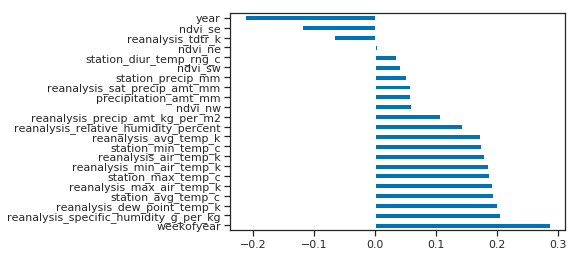

In [43]:
# San Juan
(sj_correlations
     .total_cases
     .drop('total_cases') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh()
)
sns.set(style="ticks", palette="colorblind")

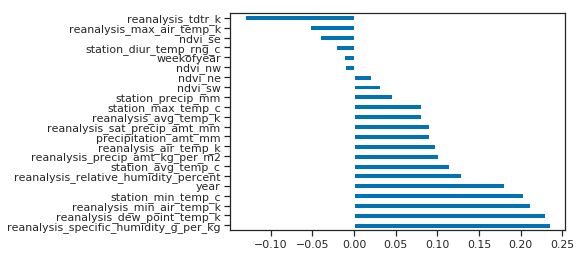

In [44]:
sns.set(style="ticks", palette="colorblind")
# iq
(iq_correlations
     .total_cases
     .drop('total_cases') # don't compare with myself
     .sort_values(ascending=False)
     .plot
     .barh()
)

In [45]:
#A few bad variables
#we can drop the columns with negative corellation in both 
#like reanalysis_tdtr_k, year, ndvi_ne, reanalysis_max_air_temp_k, ndvi_se, station_diur_temp_rng_c, weekofyear, ndvi_nw

# Remove `week_start_date` string.
dengue_train_sj.drop('reanalysis_tdtr_k', axis=1, inplace=True)
dengue_train_iq.drop('reanalysis_tdtr_k', axis=1, inplace=True)

dengue_train_sj.drop('year', axis=1, inplace=True)
dengue_train_iq.drop('year', axis=1, inplace=True)

dengue_train_sj.drop('ndvi_ne', axis=1, inplace=True)
dengue_train_iq.drop('ndvi_ne', axis=1, inplace=True)

dengue_train_sj.drop('reanalysis_max_air_temp_k', axis=1, inplace=True)
dengue_train_iq.drop('reanalysis_max_air_temp_k', axis=1, inplace=True)

dengue_train_sj.drop('ndvi_se', axis=1, inplace=True)
dengue_train_iq.drop('ndvi_se', axis=1, inplace=True)

dengue_train_sj.drop('station_diur_temp_rng_c', axis=1, inplace=True)
dengue_train_iq.drop('station_diur_temp_rng_c', axis=1, inplace=True)

dengue_train_sj.drop('weekofyear', axis=1, inplace=True)
dengue_train_iq.drop('weekofyear', axis=1, inplace=True)

dengue_train_sj.drop('ndvi_nw', axis=1, inplace=True)
dengue_train_iq.drop('ndvi_nw', axis=1, inplace=True)

In [46]:
# Remove `week_start_date` string.
dengue_test_sj.drop('reanalysis_tdtr_k', axis=1, inplace=True)
dengue_test_iq.drop('reanalysis_tdtr_k', axis=1, inplace=True)

dengue_test_sj.drop('year', axis=1, inplace=True)
dengue_test_iq.drop('year', axis=1, inplace=True)

dengue_test_sj.drop('ndvi_ne', axis=1, inplace=True)
dengue_test_iq.drop('ndvi_ne', axis=1, inplace=True)

dengue_test_sj.drop('reanalysis_max_air_temp_k', axis=1, inplace=True)
dengue_test_iq.drop('reanalysis_max_air_temp_k', axis=1, inplace=True)

dengue_test_sj.drop('ndvi_se', axis=1, inplace=True)
dengue_test_iq.drop('ndvi_se', axis=1, inplace=True)

dengue_test_sj.drop('station_diur_temp_rng_c', axis=1, inplace=True)
dengue_test_iq.drop('station_diur_temp_rng_c', axis=1, inplace=True)

dengue_test_sj.drop('weekofyear', axis=1, inplace=True)
dengue_test_iq.drop('weekofyear', axis=1, inplace=True)

dengue_test_sj.drop('ndvi_nw', axis=1, inplace=True)
dengue_test_iq.drop('ndvi_nw', axis=1, inplace=True)

In [47]:
dengue_train_sj.head()

,city,total_cases,week_start_date,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,station_avg_temp_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,4,1990-04-30,0.177617,12.42,297.572857,297.742857,292.414286,295.9,32.00,73.365714,12.42,14.012857,25.442857,29.4,20.0,16.0
1,sj,5,1990-05-07,0.155486,22.82,298.211429,298.442857,293.951429,296.4,17.94,77.368571,22.82,15.372857,26.714286,31.7,22.2,8.6
2,sj,4,1990-05-14,0.170843,34.54,298.781429,298.878571,295.434286,297.3,26.10,82.052857,34.54,16.848571,26.714286,32.2,22.8,41.4
3,sj,3,1990-05-21,0.235886,15.36,298.987143,299.228571,295.310000,297.0,13.90,80.337143,15.36,16.672857,27.471429,33.3,23.3,4.0
4,sj,6,1990-05-28,0.247340,7.52,299.518571,299.664286,295.821429,297.5,12.20,80.460000,7.52,17.210000,28.942857,35.0,23.9,5.8


In [48]:
dengue_train_iq.head()

,city,total_cases,week_start_date,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,station_avg_temp_c,station_max_temp_c,station_min_temp_c,station_precip_mm
936,iq,0,2000-07-01,0.247200,25.41,296.740000,298.450000,295.184286,293.1,43.19,92.418571,25.41,16.651429,26.400000,32.5,20.7,3.0
937,iq,0,2000-07-08,0.241657,60.61,296.634286,298.428571,295.358571,291.1,46.00,93.581429,60.61,16.862857,26.900000,34.0,20.8,55.6
938,iq,0,2000-07-15,0.128014,55.52,296.415714,297.392857,295.622857,292.6,64.77,95.848571,55.52,17.120000,26.800000,33.0,20.7,38.1
939,iq,0,2000-07-22,0.200314,5.60,295.357143,296.228571,292.797143,288.6,23.96,87.234286,5.60,14.431429,25.766667,31.5,14.7,30.0
940,iq,0,2000-07-29,0.361043,62.76,296.432857,297.635714,293.957143,291.5,31.80,88.161429,62.76,15.444286,26.600000,33.3,19.1,4.0


In [49]:
#Split it up!
#Since this is a timeseries model, we'll use a strict-future holdout set when we are splitting our train set and our test set.
#We'll keep around three quarters of the original data for training and use the rest to test. 
#We'll do this separately for our San Juan model and for our Iquitos model.

print('San Juan')
print(dengue_train_sj.shape)

print('\nIquitos')
print(dengue_train_iq.shape)

San Juan
(936, 17)

Iquitos
(520, 17)


In [50]:
print('San Juan')
print(dengue_test_sj.shape)

print('\nIquitos')
print(dengue_test_iq.shape)

San Juan
(260, 16)

Iquitos
(156, 16)


In [51]:
sj_train_subtrain = dengue_train_sj.head(800)
sj_train_subtest = dengue_train_sj.tail(dengue_train_sj.shape[0] - 800)

iq_train_subtrain = dengue_train_iq.head(400)
iq_train_subtest = dengue_train_iq.tail(dengue_train_iq.shape[0] - 400)

In [52]:
sj_train_subtrain.head(1)

,city,total_cases,week_start_date,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,station_avg_temp_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,4,1990-04-30,0.177617,12.42,297.572857,297.742857,292.414286,295.9,32.0,73.365714,12.42,14.012857,25.442857,29.4,20.0,16.0
